In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import seaborn as sns
plt.style.use('seaborn')
plt.style.use('dark_background')

# Loading the dataset

In [2]:
population = pd.read_csv('Weights/population.csv')
moreThan50k = pd.read_csv('Weights/more_than_50k.csv')

# Handling population.csv file

## 1. Preprocessing

In [3]:
population.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94


In [4]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 40 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   AAGE      199523 non-null  int64 
 1   ACLSWKR   199523 non-null  object
 2   ADTIND    199523 non-null  int64 
 3   ADTOCC    199523 non-null  int64 
 4   AHGA      199523 non-null  object
 5   AHRSPAY   199523 non-null  int64 
 6   AHSCOL    199523 non-null  object
 7   AMARITL   199523 non-null  object
 8   AMJIND    199523 non-null  object
 9   AMJOCC    199523 non-null  object
 10  ARACE     199523 non-null  object
 11  AREORGN   199523 non-null  object
 12  ASEX      199523 non-null  object
 13  AUNMEM    199523 non-null  object
 14  AUNTYPE   199523 non-null  object
 15  AWKSTAT   199523 non-null  object
 16  CAPGAIN   199523 non-null  int64 
 17  CAPLOSS   199523 non-null  int64 
 18  DIVVAL    199523 non-null  int64 
 19  FILESTAT  199523 non-null  object
 20  GRINREG   199523 non-null 

In [5]:
population.describe()

,AAGE,ADTIND,ADTOCC,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,NOEMP,SEOTR,VETYN,WKSWORK,YEAR
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000


### 1.1 Replacing missing data with NaN

In [6]:
population.loc[8, 'GRINST']

' Not in universe'

In [7]:
for i in population.columns:
    if population[i].dtype != 'int64':
        population[i] = population[i].str.strip()

In [8]:
population.loc[8]

AAGE                                       47
ACLSWKR                      Local government
ADTIND                                     43
ADTOCC                                     26
AHGA               Some college but no degree
AHRSPAY                                   876
AHSCOL                        Not in universe
AMARITL       Married-civilian spouse present
AMJIND                              Education
AMJOCC         Adm support including clerical
ARACE                                   White
AREORGN                             All other
ASEX                                   Female
AUNMEM                                     No
AUNTYPE                       Not in universe
AWKSTAT                   Full-time schedules
CAPGAIN                                     0
CAPLOSS                                     0
DIVVAL                                      0
FILESTAT                  Joint both under 65
GRINREG                       Not in universe
GRINST                        Not 

In [9]:
population = population.replace('?', np.NaN)

In [10]:
columns = []
percentageOfNan = []
colsToRemove = []
for i in population.columns:
    columns.append(i)
    percentageOfNan.append(population[i].isnull().sum()*100/population.shape[0])
    if percentageOfNan[-1] > 40:
        colsToRemove.append(i)

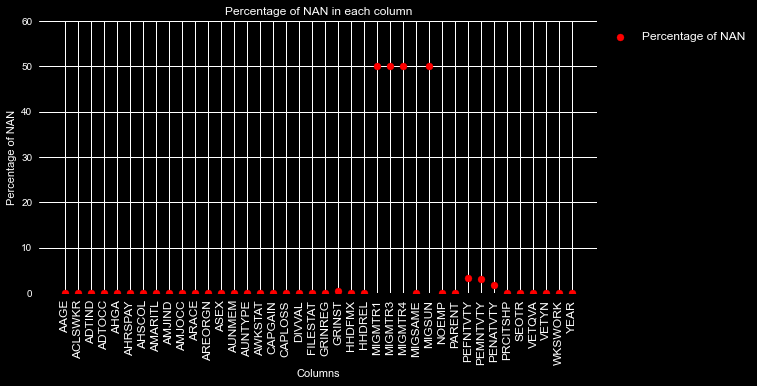

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(columns, percentageOfNan, color='red', marker='o', label='Percentage of NAN')
plt.xticks(rotation=90, fontsize=12)
plt.ylim(0, 60, 10)
plt.xlabel('Columns')
plt.ylabel('Percentage of NAN')
plt.title('Percentage of NAN in each column')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.show()


In [12]:
len(population.columns)

40

In [13]:
colsToRemove

['MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSUN']

In [14]:
preprocessedPopulation = population.drop(colsToRemove, axis=1)

In [15]:
preprocessedPopulation.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL',
       'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM',
       'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'NOEMP', 'PARENT',
       'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA',
       'VETYN', 'WKSWORK', 'YEAR'],
      dtype='object')

## 2. Feature Analysis

### 2.1 Histogram of values of each feature

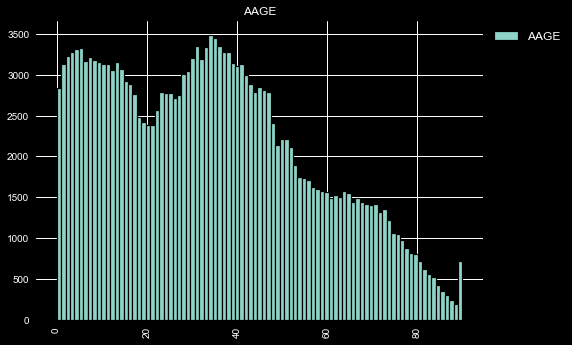

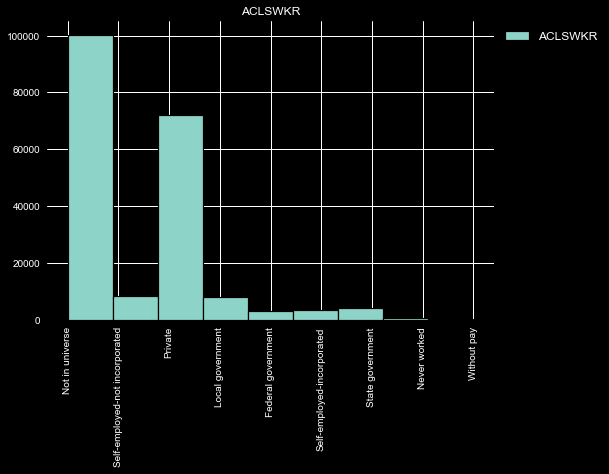

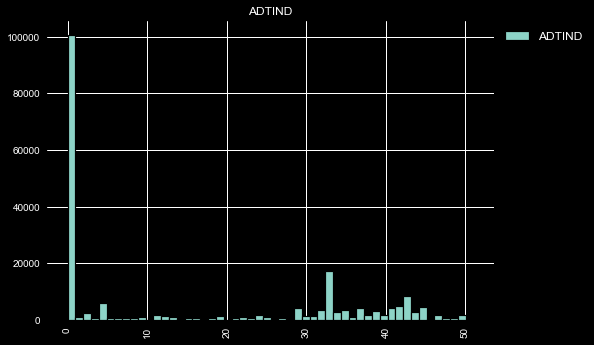

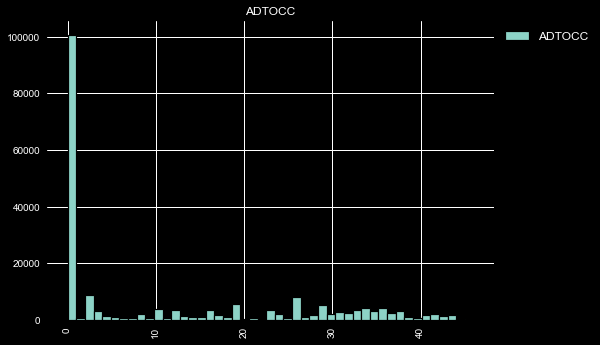

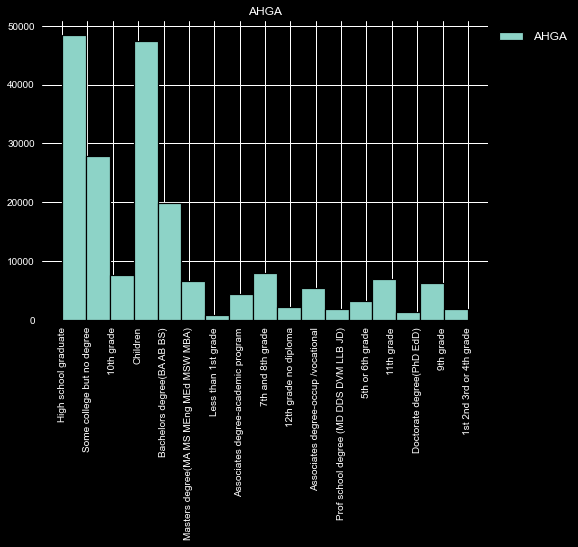

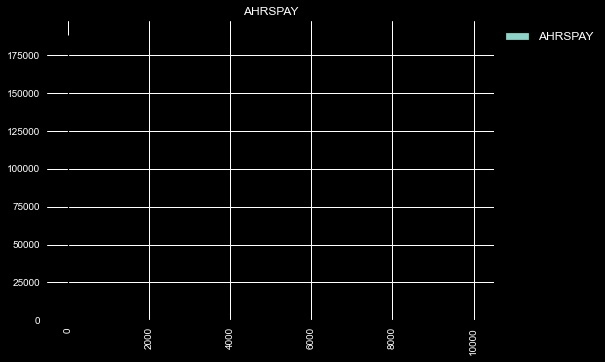

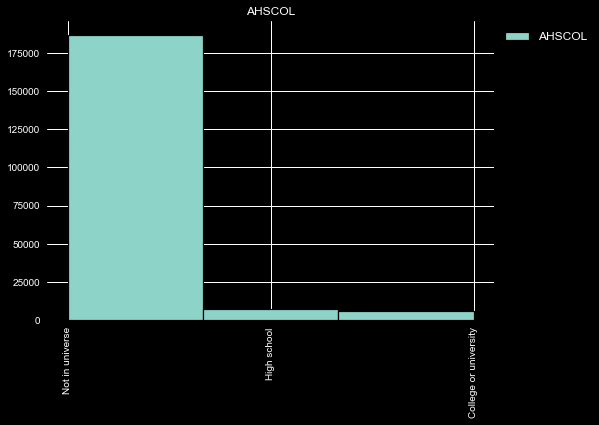

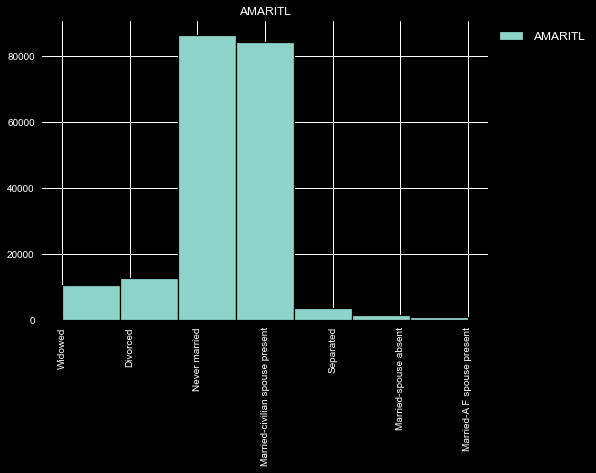

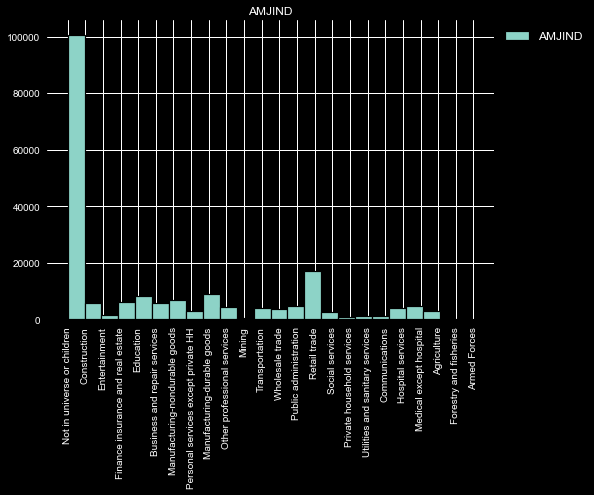

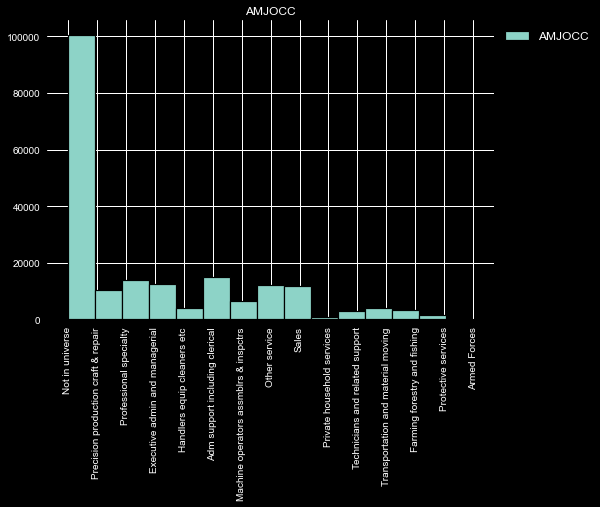

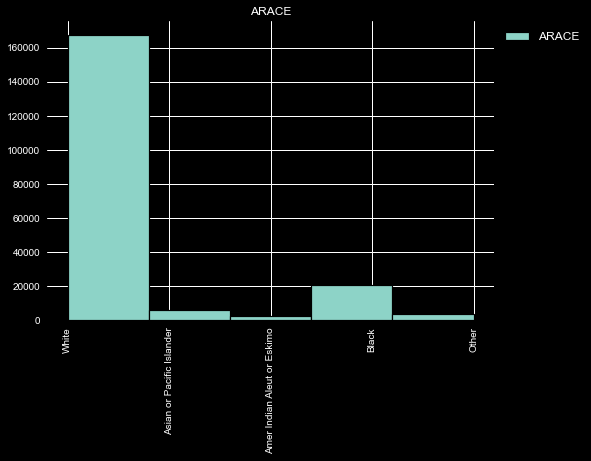

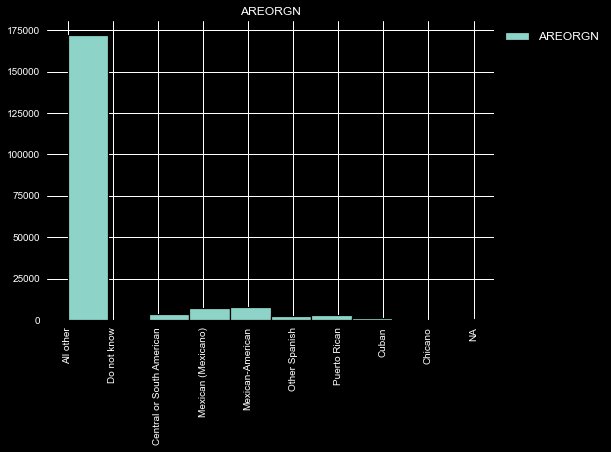

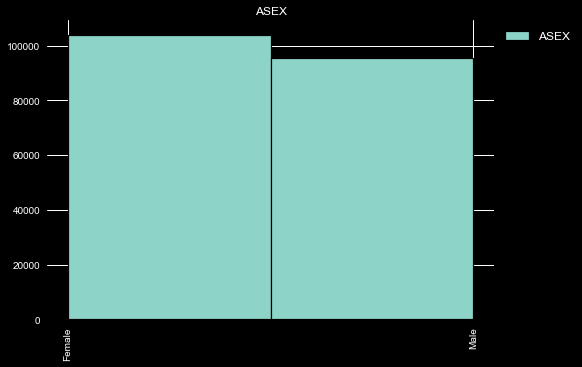

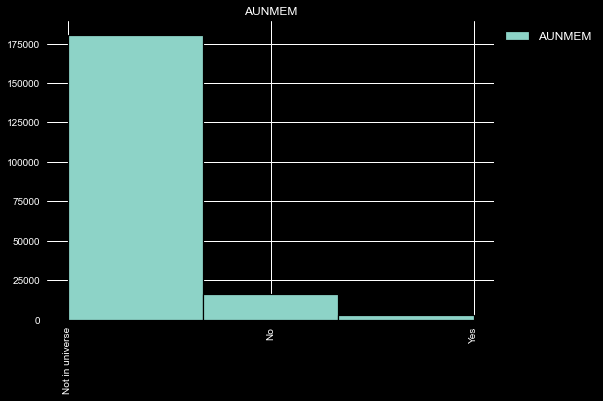

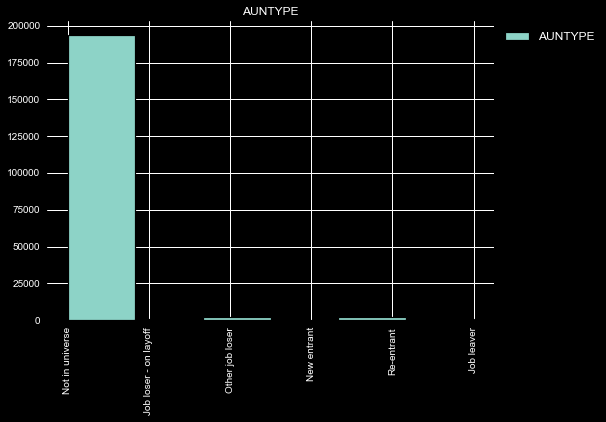

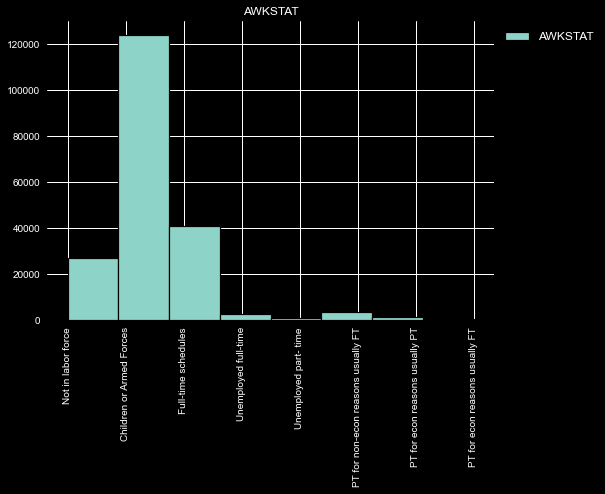

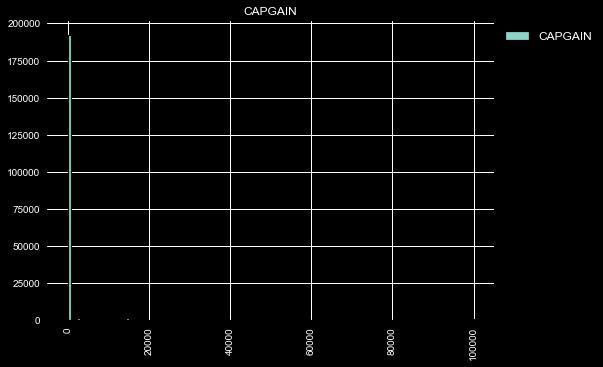

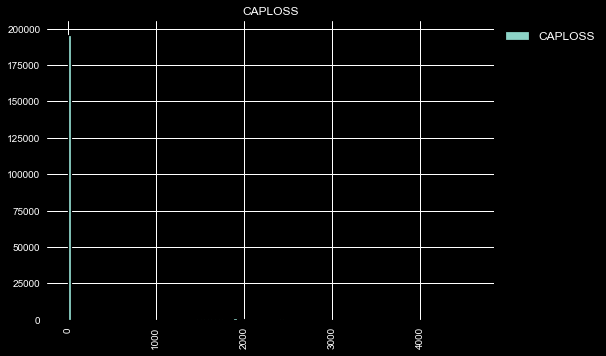

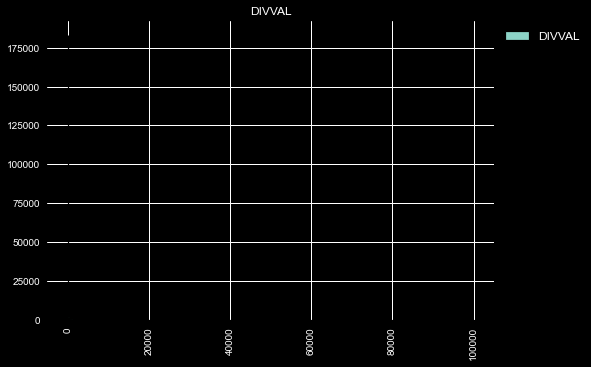

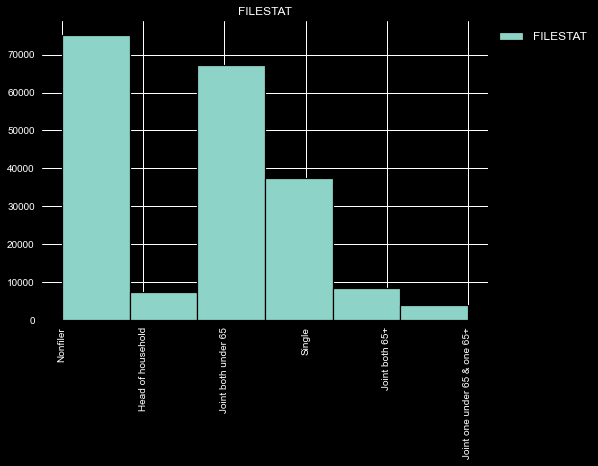

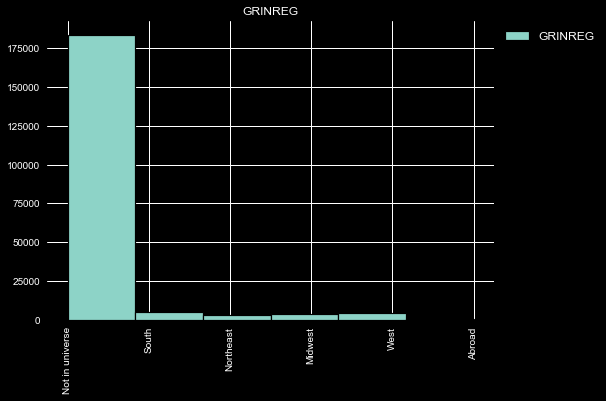

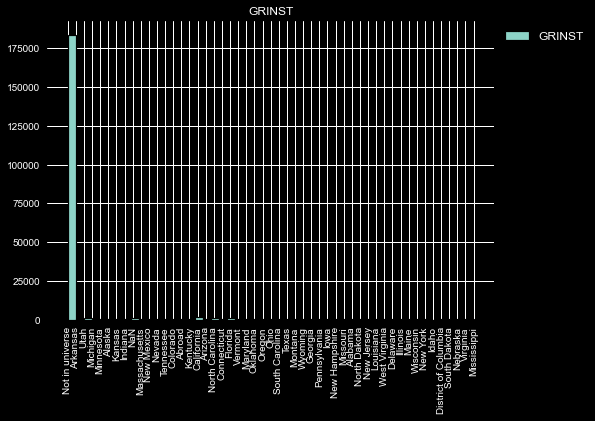

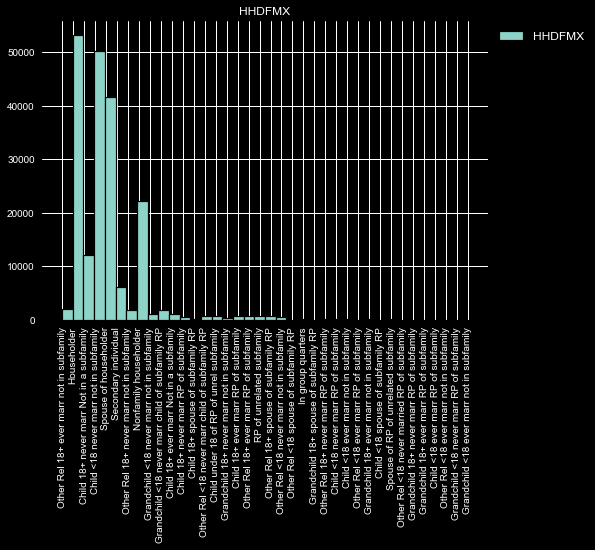

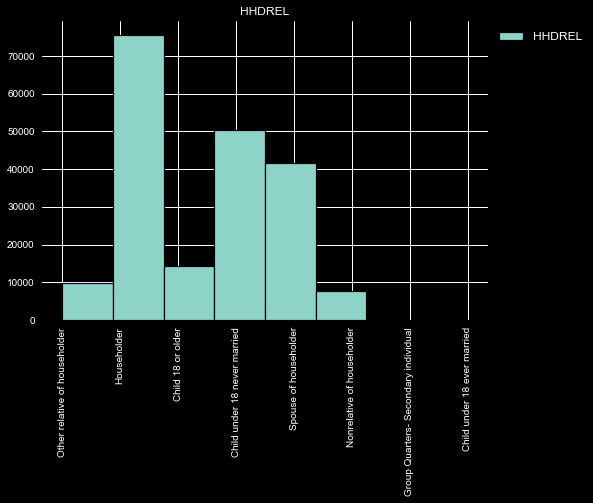

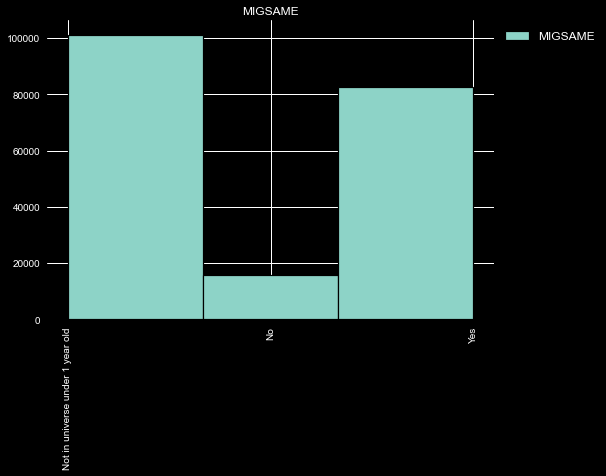

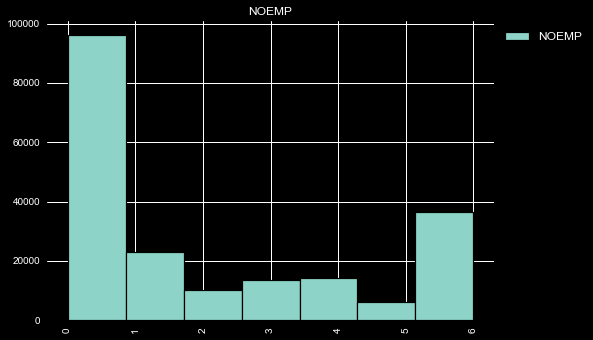

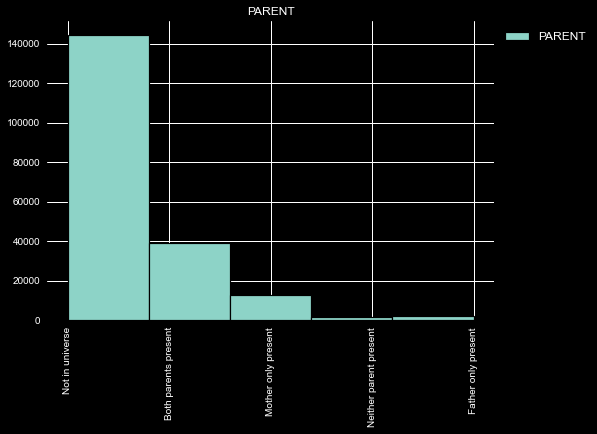

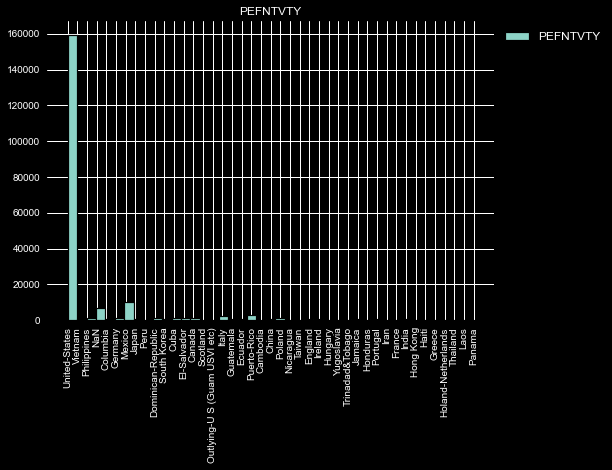

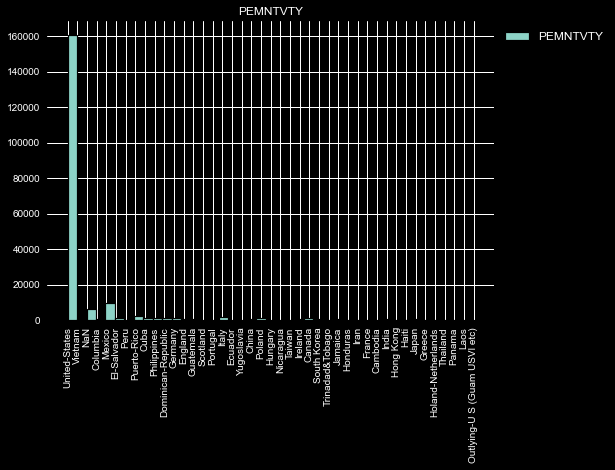

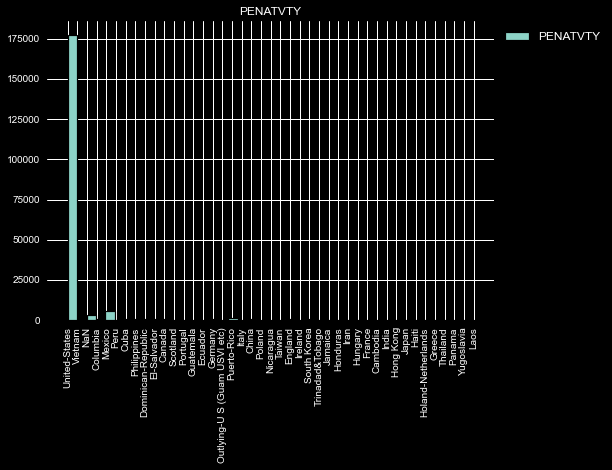

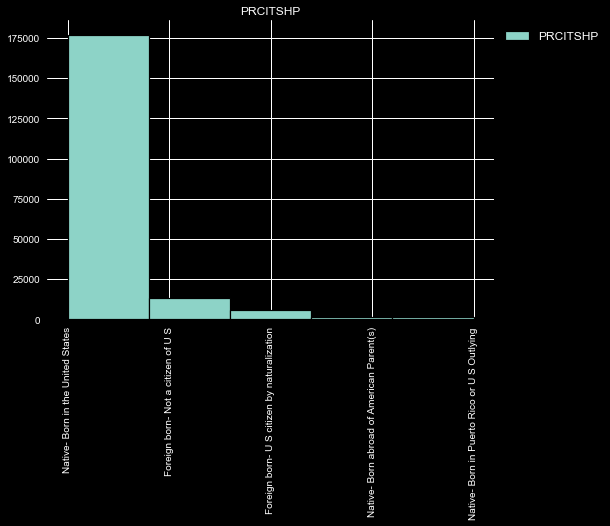

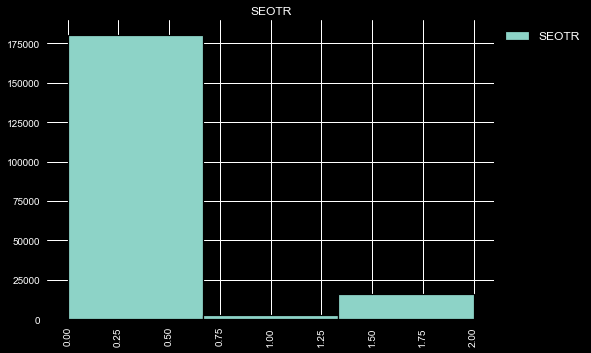

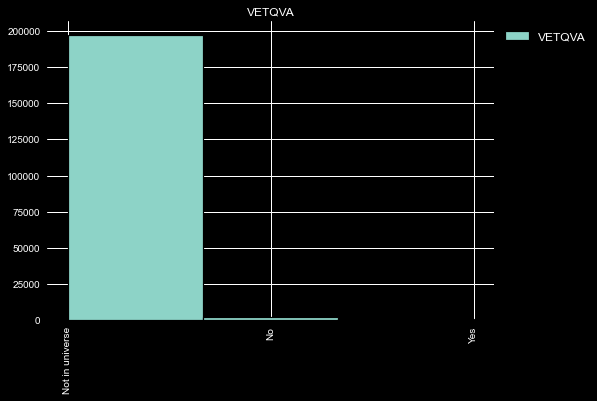

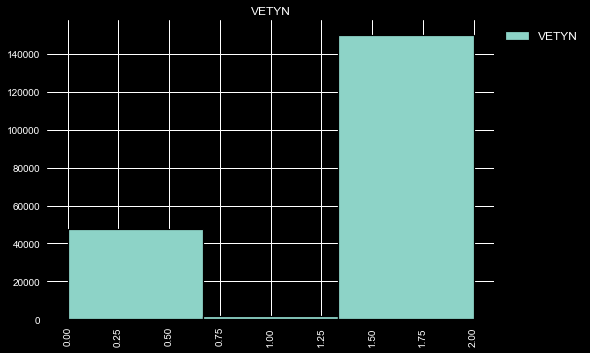

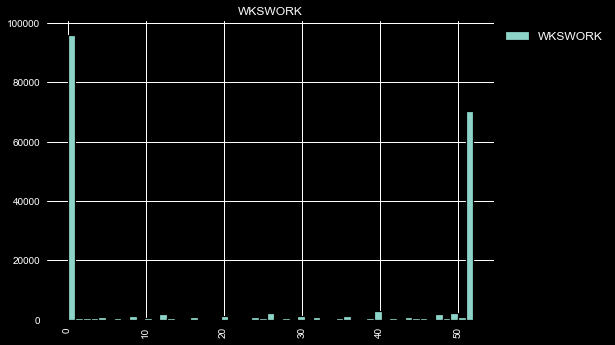

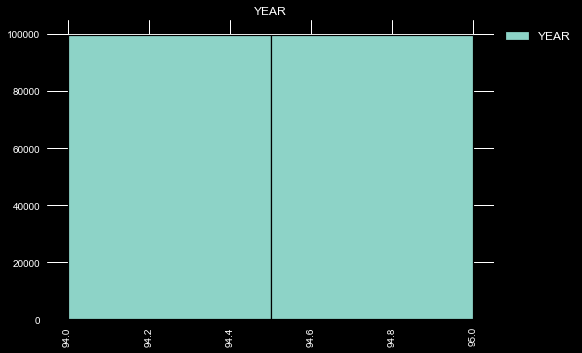

In [16]:
# fig = plt.figure(figsize=(40, 90))
# row = 4
# col = 9
# plotNo = 2
for j in range(len(preprocessedPopulation.columns)):
    # if plotNo == 10:
        # break
    # if i != 'GRINST' and i != 'PEFNTVTY' and i != 'PEMNTVTY' and i != 'PENATVTY':
    # print(i)
    i = preprocessedPopulation.columns[j]
    plt.hist(preprocessedPopulation[i].replace(np.NaN, 'NaN'), bins=len(preprocessedPopulation[i].unique()), label=i, edgecolor='black', linewidth=1.2, histtype='barstacked')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
    plt.xticks(rotation=90, fontsize=10)
    plt.title(i)
    # fig.add_subplot(col, row, plotNo)
    # plotNo += 1
    # col += 1
    # if col == 9:
    #     col = 0
    #     row += 1
    plt.show()


### 2.2 Removing the columns where one value dominates over other

In [17]:
imbalancedCols = []
for i in tqdm(range(len(preprocessedPopulation.columns))):
    col = preprocessedPopulation.columns[i]
    valCounts = list(preprocessedPopulation[col].value_counts().sort_values(ascending=False))
    if len(valCounts) == 1:
        imbalancedCols.append(col)
    elif valCounts[0] - valCounts[1] > 0.7*np.sum(valCounts):
        imbalancedCols.append(col)

100%|██████████| 36/36 [00:00<00:00, 47.43it/s]


In [200]:
imbalancedCols

['AHRSPAY',
 'AHSCOL',
 'ARACE',
 'AREORGN',
 'AUNMEM',
 'AUNTYPE',
 'CAPGAIN',
 'CAPLOSS',
 'DIVVAL',
 'GRINREG',
 'GRINST',
 'PEFNTVTY',
 'PEMNTVTY',
 'PENATVTY',
 'PRCITSHP',
 'SEOTR',
 'VETQVA']

In [19]:
preprocessedPopulation.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL',
       'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM',
       'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'NOEMP', 'PARENT',
       'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA',
       'VETYN', 'WKSWORK', 'YEAR'],
      dtype='object')

In [20]:
preprocessedPopulation.drop(imbalancedCols, axis=1, inplace=True)


In [21]:
preprocessedPopulation.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AMARITL', 'AMJIND',
       'AMJOCC', 'ASEX', 'AWKSTAT', 'FILESTAT', 'HHDFMX', 'HHDREL', 'MIGSAME',
       'NOEMP', 'PARENT', 'VETYN', 'WKSWORK', 'YEAR'],
      dtype='object')

## 3. Imputation, Bucketization and One Hot Encoding

### 3.1 Replacing missing data with mode

In [22]:
globalModeDict = {}

In [23]:
for i in preprocessedPopulation.columns:
    globalModeDict[i] = preprocessedPopulation[i].mode()[0]

In [24]:
for i in preprocessedPopulation.columns:
    preprocessedPopulation[i] = preprocessedPopulation[i].replace(np.NaN, globalModeDict[i])

### 3.2 Bucketization of the data

In [25]:
for i in preprocessedPopulation.columns:
    if preprocessedPopulation[i].dtype == 'int64' and len(preprocessedPopulation[i].unique()) > 6:
        finalbins = np.linspace(preprocessedPopulation[i].min(), preprocessedPopulation[i].max(), 6)
        finalLabels = []
        for j in range(0, len(finalbins)-1):
            # finalLabels.append((finalbins[j] + finalbins[j+1])/2)
            finalLabels.append(str(int(finalbins[j])) + '-' + str(int(finalbins[j+1])))
        preprocessedPopulation[i] = pd.cut(preprocessedPopulation[i], bins=finalbins, labels=finalLabels)

In [26]:
preprocessedPopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   AAGE      196684 non-null  category
 1   ACLSWKR   199523 non-null  object  
 2   ADTIND    98839 non-null   category
 3   ADTOCC    98839 non-null   category
 4   AHGA      199523 non-null  object  
 5   AMARITL   199523 non-null  object  
 6   AMJIND    199523 non-null  object  
 7   AMJOCC    199523 non-null  object  
 8   ASEX      199523 non-null  object  
 9   AWKSTAT   199523 non-null  object  
 10  FILESTAT  199523 non-null  object  
 11  HHDFMX    199523 non-null  object  
 12  HHDREL    199523 non-null  object  
 13  MIGSAME   199523 non-null  object  
 14  NOEMP     103540 non-null  category
 15  PARENT    199523 non-null  object  
 16  VETYN     199523 non-null  int64   
 17  WKSWORK   103540 non-null  category
 18  YEAR      199523 non-null  int64   
dtypes: category(5), int64(2

### 3.3 One Hot Encoding All the Features

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
oht = OneHotEncoder(sparse=True)

In [29]:
# # temp = pd.get_dummies(preprocessedPopulation['AAGE'], sparse=True, drop_first=False
# # columns=preprocessedPopulation['AAGE'].unique()
# # )
# for i in preprocessedPopulation.columns:
#     preprocessedPopulation[i] = pd.get_dummies(preprocessedPopulation[i], sparse=True, drop_first=False)

In [30]:
preprocessedPopulation['AAGE'].value_counts()

0-18     55637
18-36    53032
36-54    47816
54-72    27390
72-90    12809
Name: AAGE, dtype: int64

In [31]:
preprocessedPopulation['AAGE']

0         72-90
1         54-72
2          0-18
3          0-18
4          0-18
          ...  
199518    72-90
199519    54-72
199520    36-54
199521     0-18
199522    18-36
Name: AAGE, Length: 199523, dtype: category
Categories (5, object): ['0-18' < '18-36' < '36-54' < '54-72' < '72-90']

In [32]:
finalPopulationData = pd.DataFrame()

In [33]:
for itr in tqdm(range(len(preprocessedPopulation.columns))):
    i = preprocessedPopulation.columns[itr]
    ohtVector = pd.get_dummies(preprocessedPopulation[i], sparse=True, drop_first=False)
    for j in ohtVector.columns:
        finalPopulationData[str(i) + '_' + str(j)] = ohtVector[j]

100%|██████████| 19/19 [00:03<00:00,  4.89it/s]


In [34]:
finalPopulationData.head()

,AAGE_0-18,AAGE_18-36,AAGE_36-54,AAGE_54-72,AAGE_72-90,ACLSWKR_Federal government,ACLSWKR_Local government,ACLSWKR_Never worked,ACLSWKR_Not in universe,ACLSWKR_Private,...,VETYN_0,VETYN_1,VETYN_2,WKSWORK_0-10,WKSWORK_10-20,WKSWORK_20-31,WKSWORK_31-41,WKSWORK_41-52,YEAR_94,YEAR_95
0,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [226]:
finalPopulationData.shape

(199523, 172)

### 3.4 Feature Transformation

In [201]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [177]:
tempDf = finalPopulationData.copy()

In [187]:
temp = np.array(tempDf)

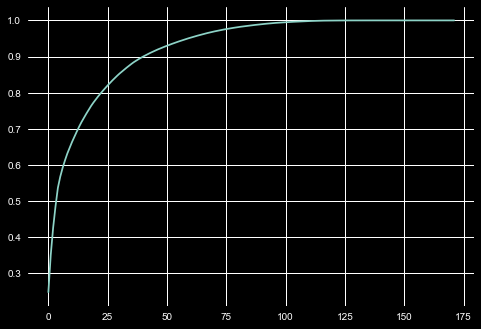

In [203]:
pca1 = PCA()
pca1.fit(temp)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))

In [204]:
model = PCA(n_components=35).fit(temp)

In [205]:
n_pcs= model.components_.shape[0]
n_pcs

35

In [206]:
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

In [207]:
initial_columns = tempDf.columns

In [208]:
most_important_names = [
    initial_columns[most_important[i]] for i in range(n_pcs)]

In [209]:
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

In [210]:
df = pd.DataFrame(dic.items())

In [212]:
pcaCols = df[1].values

In [213]:
pcaCols

array(['FILESTAT_Nonfiler', 'YEAR_94', 'ASEX_Female',
       'HHDREL_Householder', 'AMARITL_Married-civilian spouse present',
       'HHDREL_Householder', 'ADTIND_40-51', 'AAGE_18-36', 'ADTIND_30-40',
       'NOEMP_4-6', 'AAGE_36-54', 'ADTOCC_18-27', 'ADTOCC_27-36',
       'AHGA_Some college but no degree', 'MIGSAME_No',
       'PARENT_Both parents present', 'ACLSWKR_Private', 'MIGSAME_No',
       'ADTOCC_36-46', 'FILESTAT_Nonfiler',
       'AHGA_Bachelors degree(BA AB BS)', 'WKSWORK_41-52',
       'AWKSTAT_Full-time schedules', 'AWKSTAT_Full-time schedules',
       'FILESTAT_Nonfiler', 'ADTIND_20-30', 'AAGE_72-90', 'NOEMP_0-1',
       'HHDREL_Other relative of householder', 'NOEMP_2-3',
       'ADTIND_20-30', 'AMARITL_Never married',
       'AMJIND_Manufacturing-durable goods', 'AMJIND_Retail trade',
       'AHGA_Bachelors degree(BA AB BS)'], dtype=object)

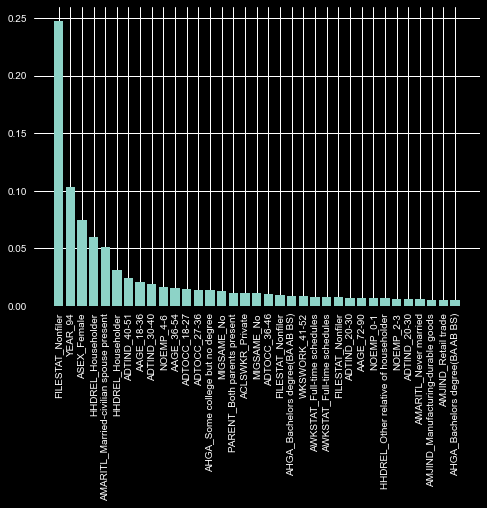

In [219]:
plt.bar(range(len(pcaCols)), model.explained_variance_ratio_)
plt.xticks(range(len(pcaCols)), pcaCols, rotation=90)
plt.show()

In [220]:
finalData = pd.DataFrame(model.transform(temp), columns=pcaCols)

In [221]:
finalData.head()

,FILESTAT_Nonfiler,YEAR_94,ASEX_Female,HHDREL_Householder,AMARITL_Married-civilian spouse present,HHDREL_Householder,ADTIND_40-51,AAGE_18-36,ADTIND_30-40,NOEMP_4-6,...,ADTIND_20-30,AAGE_72-90,NOEMP_0-1,HHDREL_Other relative of householder,NOEMP_2-3,ADTIND_20-30,AMARITL_Never married,AMJIND_Manufacturing-durable goods,AMJIND_Retail trade,AHGA_Bachelors degree(BA AB BS)
0,0.483770,1.300731,1.385809,0.545099,1.089905,-0.001693,-0.335302,0.272484,0.313310,0.189509,...,0.034447,0.703300,-0.034397,-0.778174,0.135376,0.467209,0.429525,-0.147631,0.056153,0.599966
1,-1.085517,-0.905070,-0.765526,1.233874,-0.009954,0.162984,-0.255410,0.211922,0.558446,-1.297737,...,-0.382872,0.028121,0.231661,0.636700,-0.187501,0.620706,0.116455,-0.397882,0.018606,-0.119398
2,0.974109,1.329427,0.697972,0.075654,1.145919,-0.324760,0.201175,-0.215090,-0.077525,-0.227167,...,-0.010534,0.258340,-0.067843,0.097243,-0.061165,0.034526,0.110623,-0.137262,0.081082,-0.006359
3,2.699037,-0.882720,-0.060631,-0.618923,-0.110916,0.474995,-0.253114,-0.113804,0.091837,-0.066352,...,-0.045884,-0.044323,-0.051795,-0.099372,-0.001057,-0.008480,-0.047146,-0.002359,0.014212,0.011581
4,2.699037,-0.882720,-0.060631,-0.618923,-0.110916,0.474995,-0.253114,-0.113804,0.091837,-0.066352,...,-0.045884,-0.044323,-0.051795,-0.099372,-0.001057,-0.008480,-0.047146,-0.002359,0.014212,0.011581


In [227]:
ctr  = 0
for i in finalPopulationData.columns:
    print(ctr, i)
    ctr += 1

0 AAGE_0-18
1 AAGE_18-36
2 AAGE_36-54
3 AAGE_54-72
4 AAGE_72-90
5 ACLSWKR_Federal government
6 ACLSWKR_Local government
7 ACLSWKR_Never worked
8 ACLSWKR_Not in universe
9 ACLSWKR_Private
10 ACLSWKR_Self-employed-incorporated
11 ACLSWKR_Self-employed-not incorporated
12 ACLSWKR_State government
13 ACLSWKR_Without pay
14 ADTIND_0-10
15 ADTIND_10-20
16 ADTIND_20-30
17 ADTIND_30-40
18 ADTIND_40-51
19 ADTOCC_0-9
20 ADTOCC_9-18
21 ADTOCC_18-27
22 ADTOCC_27-36
23 ADTOCC_36-46
24 AHGA_10th grade
25 AHGA_11th grade
26 AHGA_12th grade no diploma
27 AHGA_1st 2nd 3rd or 4th grade
28 AHGA_5th or 6th grade
29 AHGA_7th and 8th grade
30 AHGA_9th grade
31 AHGA_Associates degree-academic program
32 AHGA_Associates degree-occup /vocational
33 AHGA_Bachelors degree(BA AB BS)
34 AHGA_Children
35 AHGA_Doctorate degree(PhD EdD)
36 AHGA_High school graduate
37 AHGA_Less than 1st grade
38 AHGA_Masters degree(MA MS MEng MEd MSW MBA)
39 AHGA_Prof school degree (MD DDS DVM LLB JD)
40 AHGA_Some college but no degr

## 4. Clustering

### Applying K-Medians Clustering

In [265]:
from pyclustering.cluster.kmedians import kmedians

In [266]:
dataPts = finalData.values

In [249]:
def get_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

In [263]:
def lossFn(medians, clusters, dataPoints):
    loss = 0
    for i in tqdm(range(len(clusters))):
        for j in range(len(clusters[i])):
            loss += get_distance(medians[i], dataPoints[clusters[i][j]])
    return loss

In [297]:
losses = []
for j in tqdm(range(10, 25)):
    initCenter = []
    for i in range(j):
        initCenter.append(finalData.sample(n=1, random_state=i).iloc[0])
    kmed = kmedians(data=finalData, number_clusters=j, initial_medians=initCenter)
    kmed.process()
    medians = kmedians.get_medians(kmed)
    clusters = kmedians.get_clusters(kmed)
    print(len(medians), len(clusters))
    losses.append(kmedians.get_total_wce(kmed))


  7%|▋         | 1/15 [02:17<32:07, 137.65s/it]

10 10


 13%|█▎        | 2/15 [04:37<30:04, 138.77s/it]

10 10


 20%|██        | 3/15 [06:51<27:21, 136.75s/it]

11 11


 27%|██▋       | 4/15 [09:09<25:09, 137.27s/it]

12 12


 33%|███▎      | 5/15 [11:31<23:09, 138.96s/it]

13 13


 40%|████      | 6/15 [13:56<21:07, 140.84s/it]

14 14


 47%|████▋     | 7/15 [16:30<19:22, 145.30s/it]

15 15


 53%|█████▎    | 8/15 [19:12<17:34, 150.69s/it]

15 15


 60%|██████    | 9/15 [21:43<15:03, 150.56s/it]

16 16


 67%|██████▋   | 10/15 [24:28<12:55, 155.16s/it]

17 17


 73%|███████▎  | 11/15 [27:32<10:55, 163.83s/it]

18 18


 80%|████████  | 12/15 [30:29<08:23, 167.88s/it]

19 19


 87%|████████▋ | 13/15 [33:09<05:31, 165.61s/it]

20 20


 93%|█████████▎| 14/15 [36:10<02:50, 170.31s/it]

21 21


100%|██████████| 15/15 [38:56<00:00, 155.79s/it]

22 22


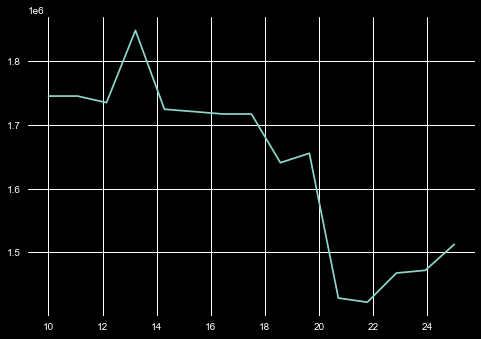

In [300]:
plt.plot(np.linspace(10, 25, len(losses)), losses)

In [302]:
def getAvgDist(clusters, medians, dataPts):
    dist = []
    for i in tqdm(range(len(clusters))):
        for j in range(len(clusters[i])):
            dist.append(get_distance(dataPts[clusters[i][j]], medians[i]))
    return np.mean(dist)

In [303]:
losses = []
avgDist = []
for j in tqdm(range(10, 25)):
    initCenter = []
    for i in range(j):
        initCenter.append(finalData.sample(n=1, random_state=i).iloc[0])
    kmed = kmedians(data=finalData, number_clusters=j,
                    initial_medians=initCenter)
    kmed.process()
    medians = kmedians.get_medians(kmed)
    clusters = kmedians.get_clusters(kmed)
    # print(len(medians), len(clusters))
    losses.append(kmedians.get_total_wce(kmed))
    avgDist.append(getAvgDist(clusters, medians, dataPts))

100%|██████████| 15/15 [38:40<00:00, 154.70s/it]


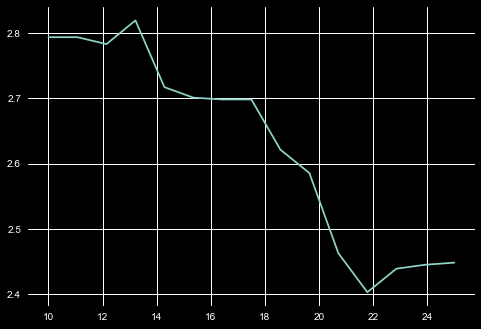

In [304]:
plt.plot(np.linspace(10, 25, len(avgDist)), avgDist)

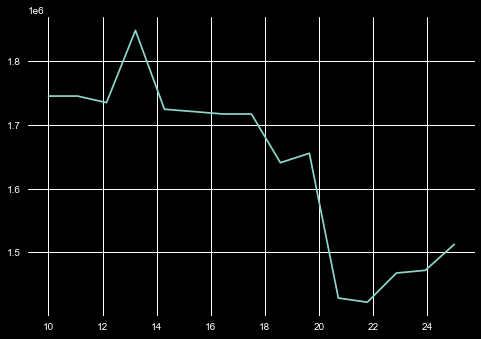

In [305]:
plt.plot(np.linspace(10, 25, len(losses)), losses)

In [280]:
initCenter = []
j = 10
for i in range(j):
    initCenter.append(finalData.sample(n=1, random_state=i).iloc[0])
print(j, len(initCenter))
kmed = kmedians(data=finalData, number_clusters=j, initial_medians=initCenter)
kmed.process()
medians = kmedians.get_medians(kmed)
clusters = kmed.get_clusters()
print(len(medians), len(clusters))

10 10


KeyboardInterrupt: 

In [296]:
j = 10
initCenter = []
for i in range(j):
    initCenter.append(finalData.sample(n=1, random_state=i).iloc[0])
kmed = kmedians(data=finalData, number_clusters=j,initial_medians=initCenter)
kmed.process()
medians = kmedians.get_medians(kmed)
clusters = kmedians.get_clusters(kmed)
print(len(medians), len(clusters))

KeyboardInterrupt: 

In [287]:
newMed = kmed.get_medians
newMed1 = kmedians.get_medians(kmed)

In [295]:
err = kmedians.get_total_wce(kmed)
err

1745078.3046107371

In [289]:
newClus = kmedians.get_clusters(kmed)

In [291]:
len(newClus)

10

In [290]:
newMed, newMed1, newClus

(<bound method kmedians.get_medians of <pyclustering.cluster.kmedians.kmedians object at 0x7faca38bec10>>,
 [[-1.6587547823896482,
   0.945337679382283,
   -0.48998698960461756,
   0.958801576479182,
   -0.8100190542761485,
   0.1717488798840007,
   -0.05843602522931321,
   -0.018902726528317912,
   0.3030720379524795,
   0.008697095598927895,
   0.6311954536824883,
   -0.16401429097353118,
   0.30350235793526126,
   0.2708518272359253,
   -0.498761800196464,
   -0.3222655822911278,
   0.12482787452263548,
   0.22284086481655435,
   0.5159168185835243,
   -0.00011734785776731926,
   -0.43190382832699525,
   0.24190806300254022,
   0.00991834746174683,
   -0.05521256412527038,
   -0.28684318751213944,
   0.4162146872618091,
   -0.03462895700357612,
   0.16936191331505868,
   -0.05449362273341181,
   -0.03330737224238476,
   0.2748589414436264,
   -0.06196153493275097,
   0.08887315246184424,
   -0.07965065810426403,
   0.039462663904843716],
  [-1.2475599378403426,
   1.1169744722138353

In [282]:
medians = kmedians.get_medians(kmed)
clusters = kmed.get_clusters()
print(len(medians), len(clusters))


10 10


In [93]:
z_pca.shape

(199523, 2)

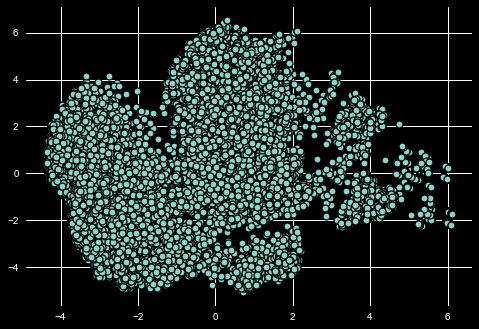

In [94]:
plt.scatter(z_pca[:, 0], z_pca[:, 1],
            linewidths=1.2, edgecolors='black')

In [96]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
df_embed = pd.DataFrame(finalX)
x = 50
m = TSNE(learning_rate='auto', init='pca', n_jobs=-
         1, n_iter=250, n_iter_without_progress=50)
tsne_features = m.fit_transform(df_embed)
df_embed['x'] = tsne_features[:, 0]
df_embed['y'] = tsne_features[:, 1]
sns.scatterplot(x="x", y="y", data=df_embed)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')